In [60]:
# import pandas to read excel file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
# Reading the data into a dataframe and exclude first 4 rows that has information on data and columns
# and reading 12 relavant columns
ND=pd.read_excel("Nutrition-Facts.xlsx",sheet_name='SR Legacy and FNDDS',header=4,usecols = "A:K,DM")

In [62]:
# New Column names
new_cols = ['ID', 'ItemName', 'Group', 'CaloriesPer100Gms', 'FatinGms', 'ProteininGms','CarbsinGms','SugarsinGms','FiberinGms','CholesterolinGms','SaturatedFatsinGms','200CalorieWeight']

In [63]:
# Renaming Column Names
ND.columns = new_cols
ND.head(5)

,ID,ItemName,Group,CaloriesPer100Gms,FatinGms,ProteininGms,CarbsinGms,SugarsinGms,FiberinGms,CholesterolinGms,SaturatedFatsinGms,200CalorieWeight
0,167513,Pillsbury Cinnamon Rolls With Icing Refrigerat...,Baked Foods,330.0,11.27,4.34,53.42,21.34,1.4,0.0,3.250,60.606
1,167514,Kraft Foods Shake N Bake Original Recipe Coati...,Baked Foods,377.0,3.70,6.10,79.80,NaN,NaN,NaN,NaN,53.050
2,167515,George Weston Bakeries Thomas English Muffins,Baked Foods,232.0,1.80,8.00,46.00,NaN,NaN,NaN,0.308,86.207
3,167516,Waffles Buttermilk Frozen Ready-To-Heat,Baked Foods,273.0,9.22,6.58,41.05,4.30,2.2,15.0,1.898,73.260
4,167517,Waffle Buttermilk Frozen Ready-To-Heat Toasted,Baked Foods,309.0,9.49,7.42,48.39,4.41,2.6,13.0,2.275,64.725


In [64]:
# Identify duplicate IDs, Item Names
print("ID is duplicated - {}".format(any(ND.ID.duplicated())))
print("Item Name is duplicated - {}".format(any(ND.ItemName.duplicated())))

ID is duplicated - False
Item Name is duplicated - False


In [65]:
# Check for NaN in the columns
print("The column ID contains NaN - %r " % ND.ID.isnull().values.any())
print("The column ItemName contains NaN - %s " % ND.ItemName.isnull().values.any())
print("The column Group contains NaN - %s " % ND.Group.isnull().values.any())
print("The column Calories contains NaN - %r " % ND.CaloriesPer100Gms.isnull().values.any())
print("The column FatinGms contains NaN - %s " % ND.FatinGms.isnull().values.any())
print("The column ProteininGms contains NaN - %s " % ND.ProteininGms.isnull().values.any())
print("The column CarbsinGms contains NaN - %s " % ND.CarbsinGms.isnull().values.any())
print("The column SugarsinGms contains NaN - %s " % ND.SugarsinGms.isnull().values.any())

The column ID contains NaN - False 
The column ItemName contains NaN - False 
The column Group contains NaN - True 
The column Calories contains NaN - False 
The column FatinGms contains NaN - False 
The column ProteininGms contains NaN - False 
The column CarbsinGms contains NaN - False 
The column SugarsinGms contains NaN - True 


In [66]:
# Identify outliers. In this case records that have "SugarsinGms" as none 
size_prev = ND.shape
ND2 = ND[np.isfinite(ND['SugarsinGms'])] 
size_after = ND2.shape

The size of previous data was - 14163 rows and the size of the new one is 12377 rows


In [73]:
# Reporting the difference in size
print("The size of previous data was - {prev[0]} rows and the size of the new one is {after[0]} rows".
      format(prev=size_prev, after=size_after))

The size of previous data was - 14163 rows and the size of the new one is 12377 rows


{'whiskers': [<matplotlib.lines.Line2D at 0x1d6df978b50>,
 'caps': [<matplotlib.lines.Line2D at 0x1d6df980250>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d6df978850>],
 'medians': [<matplotlib.lines.Line2D at 0x1d6df980910>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d6df980c70>],
 'means': []}

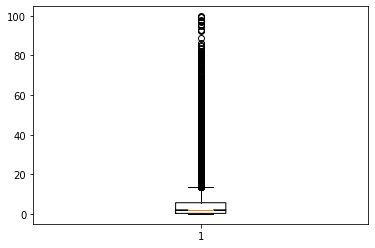

In [74]:
# Plotting Box plots to check outliers
plt.boxplot(ND2.SugarsinGms, notch=True)

In [75]:
# Preserving only the values that are less than 90 Gms to remove outliers
ND3 = ND2[(ND2['SugarsinGms'] <= 90)]
print("After getting rid of outliers the new size of the data is {}".format(*ND3.shape))

After getting rid of outliers the new size of the data is 12361


In [83]:
from Levenshtein import distance
# Conduct fuzzy matching on first 30 items
name_of_group='Baked Foods'
ND4=ND3.head(30)
ND4['Group']
for k in ND4['Group']:
    print("{} {} {}".format(k,name_of_group,distance(name_of_group,k)))

Baked Foods Baked Foods 0
Baked Foods Baked Foods 0
Baked Foods Baked Foods 0
Baked Foods Baked Foods 0
Baked Foods Baked Foods 0
Baked Foods Baked Foods 0
Baked Foods Baked Foods 0
Baked Foods Baked Foods 0
Baked Foods Baked Foods 0
Baked Foods Baked Foods 0
Baked Foods Baked Foods 0
Baked Foods Baked Foods 0
Baked Foods Baked Foods 0
Baked Foods Baked Foods 0
Baked Foods Baked Foods 0
Baked Foods Baked Foods 0
Baked Foods Baked Foods 0
Baked Foods Baked Foods 0
Baked Foods Baked Foods 0
Snacks Baked Foods 10
Snacks Baked Foods 10
Sweets Baked Foods 9
Sweets Baked Foods 9
Snacks Baked Foods 10
Sweets Baked Foods 9
Snacks Baked Foods 10
Snacks Baked Foods 10
Snacks Baked Foods 10
Snacks Baked Foods 10
Snacks Baked Foods 10
